In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.datasets import load_digits
from sklearn.svm import SVR
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense,  Dropout, SimpleRNN, LSTM
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import shap

In [ ]:
# All Data Load

data = pd.read_excel('/content/drive/MyDrive/CSS Project: Carbon Emission Prediction: Kritika Verma, Deepanshu Mishra/CO2_emission_data_without_feature_selection.xlsx')
X = data[["Year",
    "GDP (Constant LCU) - may 2018",
    "Population",
    "Export (Constant LCU) - may 2018",
    "Import (Constant LCU) - may 2018",
    "Primary Energy Production (million metric tons of oil eq.)",
    "Electric Power Consumption (kWh per capita)",
    "Energy use (kg of oil equivalent per capita)",
    "Electricity generation by Biomass and Waste (kwh)",
    "Electricity generation by (kWh) Coal",
    "Electricity generation by (kWh) Gas",
    "Electricity generation by (kWh) Geothermal",
    "Electricity generation by (kWh) Hydroelectric",
    "Electricity generation by (kWh) Nuclear",
    "Electricity generation by (kWh) Oil",
    "Electricity generation by (kWh) Solar Tide Wave",
    "Electricity generation by (kWh) Wind",
    "Total electricity Production (kWh)",
    "Energy imports, net (% of energy use)",
    "Fossil fuel energy consumption (% of total)",
    "Power Generation Capacities (kW) Biomass and Waste",
    "Power Generation Capacities (kW) Fossil Fuels",
    "Power Generation Capacities (kW) Hydroelectric",
    "Power Generation Capacities (kW) Nuclear",
    "Power Generation Capacities (kW) Solar Tide Wave",
    "Power Generation Capacities (kW) Wind",
    "Total Power Generation Capacities (kW)"]]
y = data["CO2 Emissions total (kt)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
plot_test = []
for k in y_test:
  plot_test.append(k)

In [ ]:
# All Data Load Normalised

data = pd.read_excel('/content/drive/MyDrive/CSS Project: Carbon Emission Prediction: Kritika Verma, Deepanshu Mishra/CO2_emission_data_without_feature_selection_normalised.xlsx')
X = data[["Year",
    "GDP (Constant LCU) - may 2018",
    "Population",
    "Export (Constant LCU) - may 2018",
    "Import (Constant LCU) - may 2018",
    "Primary Energy Production (million metric tons of oil eq.)",
    "Electric Power Consumption (kWh per capita)",
    "Energy use (kg of oil equivalent per capita)",
    "Electricity generation by Biomass and Waste (kwh)",
    "Electricity generation by (kWh) Coal",
    "Electricity generation by (kWh) Gas",
    "Electricity generation by (kWh) Geothermal",
    "Electricity generation by (kWh) Hydroelectric",
    "Electricity generation by (kWh) Nuclear",
    "Electricity generation by (kWh) Oil",
    "Electricity generation by (kWh) Solar Tide Wave",
    "Electricity generation by (kWh) Wind",
    "Total electricity Production (kWh)",
    "Energy imports, net (% of energy use)",
    "Fossil fuel energy consumption (% of total)",
    "Power Generation Capacities (kW) Biomass and Waste",
    "Power Generation Capacities (kW) Fossil Fuels",
    "Power Generation Capacities (kW) Hydroelectric",
    "Power Generation Capacities (kW) Nuclear",
    "Power Generation Capacities (kW) Solar Tide Wave",
    "Power Generation Capacities (kW) Wind",
    "Total Power Generation Capacities (kW)"]]
y = data["CO2 Emissions total (kt)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
plot_test = []
for k in y_test:
  plot_test.append(k)

In [ ]:
# Data Load Feature Selection

data = pd.read_excel('/content/drive/MyDrive/CSS Project: Carbon Emission Prediction: Kritika Verma, Deepanshu Mishra/CO2_emission_data_with_correlation_feature_selection.xlsx')
X = data[["Year",
    "GDP (Constant LCU) - may 2018",
    "Population",
    "Export (Constant LCU) - may 2018",
    "Import (Constant LCU) - may 2018",
    "Electric Power Consumption (kWh per capita)"]]
y = data["CO2 Emissions total (kt)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
plot_test = []
for k in y_test:
  plot_test.append(k)

In [ ]:
# Data Load Feature Selection Normalised

data = pd.read_excel('/content/drive/MyDrive/CSS Project: Carbon Emission Prediction: Kritika Verma, Deepanshu Mishra/CO2_emission_data_with_correlation_feature_selection_normalised.xlsx')
X = data[["Year",
    "GDP (Constant LCU) - may 2018",
    "Population",
    "Export (Constant LCU) - may 2018",
    "Import (Constant LCU) - may 2018",
    "Electric Power Consumption (kWh per capita)"]]
y = data["CO2 Emissions total (kt)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
plot_test = []
for k in y_test:
  plot_test.append(k)

In [ ]:
# Data Load Random Selection

data = pd.read_excel('/content/drive/MyDrive/CSS Project: Carbon Emission Prediction: Kritika Verma, Deepanshu Mishra/CO2_emission_data.xlsx')
X = data[["Year",
    "GDP (Constant LCU) - may 2018",
    "Population",
    "Export (Constant LCU) - may 2018",
    "Import (Constant LCU) - may 2018",
    "Primary Energy Production (million metric tons of oil eq.)",
    "Electric Power Consumption (kWh per capita)",
    "Energy use (kg of oil equivalent per capita)",
    "Electricity generation by (kWh) Coal",
    "Electricity generation by (kWh) Gas",
    "Electricity generation by (kWh) Geothermal",
    "Electricity generation by (kWh) Hydroelectric",
    "Electricity generation by (kWh) Nuclear",
    "Electricity generation by (kWh) Oil",
    "Total electricity Production (kWh)",
    "Energy imports, net (% of energy use)",
    "Fossil fuel energy consumption (% of total)",
    "Power Generation Capacities (kW) Fossil Fuels",
    "Power Generation Capacities (kW) Hydroelectric",
    "Power Generation Capacities (kW) Nuclear",
    "Total Power Generation Capacities (kW)"]]
y = data["CO2 Emissions total (kt)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
plot_test = []
for k in y_test:
  plot_test.append(k)

In [ ]:
# Data Load Random Selection Normalised

data = pd.read_excel('/content/drive/MyDrive/CSS Project: Carbon Emission Prediction: Kritika Verma, Deepanshu Mishra/CO2_emission_data_normalised.xlsx')
X = data[["Year",
    "GDP (Constant LCU) - may 2018",
    "Population",
    "Export (Constant LCU) - may 2018",
    "Import (Constant LCU) - may 2018",
    "Primary Energy Production (million metric tons of oil eq.)",
    "Electric Power Consumption (kWh per capita)",
    "Energy use (kg of oil equivalent per capita)",
    "Electricity generation by (kWh) Coal",
    "Electricity generation by (kWh) Gas",
    "Electricity generation by (kWh) Geothermal",
    "Electricity generation by (kWh) Hydroelectric",
    "Electricity generation by (kWh) Nuclear",
    "Electricity generation by (kWh) Oil",
    "Total electricity Production (kWh)",
    "Energy imports, net (% of energy use)",
    "Fossil fuel energy consumption (% of total)",
    "Power Generation Capacities (kW) Fossil Fuels",
    "Power Generation Capacities (kW) Hydroelectric",
    "Power Generation Capacities (kW) Nuclear",
    "Total Power Generation Capacities (kW)"]]
y = data["CO2 Emissions total (kt)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
plot_test = []
for k in y_test:
  plot_test.append(k)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mean Squared Error (MSE): 3449502380.35346
R-squared (R2) Score: 0.9957452250787054
Root Mean Squared Error (RMSE): 58732.464449854815
Mean Absolute Error (MAE): 37655.10320076674


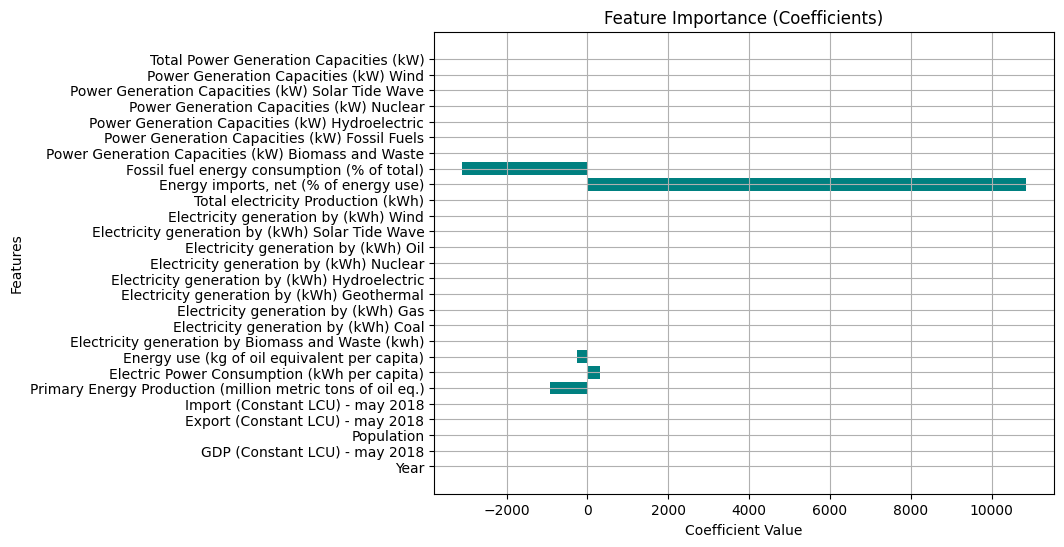

In [ ]:
# Linear Regression
imputer = SimpleImputer(strategy="constant", fill_value=0)
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# y_train = imputer.fit_transform(y_train.values.reshape(-1, 1))  # Reshape to 2D for imputer
# y_train = y_train.ravel()

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


plot_lr = []
for k in y_pred:
  plot_lr.append(k)

coefficients = model.coef_

# Reshape coefficients to a 1D array
coefficients = coefficients.flatten()  # or coefficients.ravel()

# Create a bar plot of the coefficients
plt.figure(figsize=(8, 6))
plt.barh(X.columns, coefficients, color="teal")
plt.title("Feature Importance (Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.grid()
plt.show()

In [ ]:
# Extreme Learning Machine

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Number of hidden neurons
n_hidden_neurons = 200

# Step 1: Randomly initialize input weights and biases
input_weights = np.random.uniform(-1, 1, (X_train.shape[1], n_hidden_neurons))
biases = np.random.uniform(-1, 1, (1, n_hidden_neurons))

# Step 2: Compute hidden layer output matrix (H)
H_train = 1 / (1 + np.exp(-(np.dot(X_train, input_weights) + biases)))  # Sigmoid activation

# Step 3: Compute output weights (Beta)
output_weights = np.dot(np.linalg.pinv(H_train), y_train)

# Step 4: Predict on test data
H_test = 1 / (1 + np.exp(-(np.dot(X_test, input_weights) + biases)))  # Sigmoid activation
y_pred = np.dot(H_test, output_weights)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

plot_elm = []
for k in y_pred:
  plot_elm.append(k)

Mean Squared Error (MSE): 37839955620.04186
R-squared (R2) Score: 0.9533264580097038
Root Mean Squared Error (RMSE): 194524.94857997485
Mean Absolute Error (MAE): 112881.20720083769


In [ ]:
# Random Forest

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42) # Changed to RandomForestRegressor
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

plot_rf = []
for k in y_pred:
  plot_rf.append(k)

Mean Squared Error (MSE): 1965495644.6490843
R-squared (R2) Score: 0.9975756672543853
Root Mean Squared Error (RMSE): 44333.91077548973
Mean Absolute Error (MAE): 26943.893710768818


Mean Squared Error (MSE): 6177902125.919455
R-squared (R2) Score: 0.992379891319605
Root Mean Squared Error (RMSE): 78599.63184340914
Mean Absolute Error (MAE): 58827.421923076916


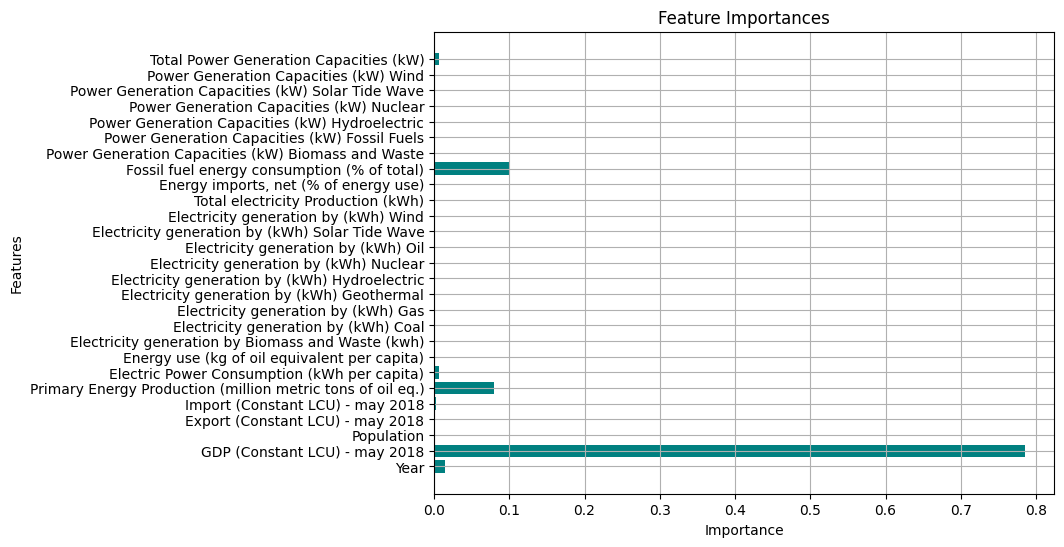

In [ ]:
# Decision Tree

# Create a Decision Tree model
model = DecisionTreeRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

plot_dt = []
for k in y_pred:
  plot_dt.append(k)

# Feature importance visualization
feature_importances = model.feature_importances_
plt.figure(figsize=(8, 6))
plt.barh(X.columns, feature_importances, color="teal")
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.grid()
plt.show()

Mean Squared Error (MSE): 1989109085.0588279
R-squared (R2) Score: 0.9975465413507092
Root Mean Squared Error (RMSE): 44599.42920104278
Mean Absolute Error (MAE): 29439.342123163085


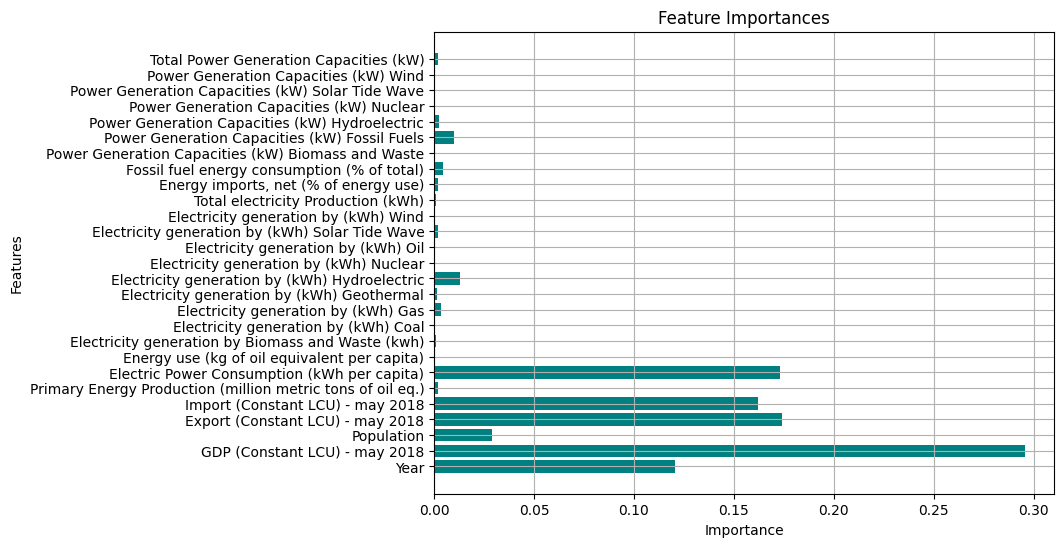

In [ ]:
# Gradient Boosting

# Initialize the Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

plot_gb = []
for k in y_pred:
  plot_gb.append(k)

# Feature importance visualization
feature_importances = model.feature_importances_
plt.figure(figsize=(8, 6))
plt.barh(X.columns, feature_importances, color="teal")
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.grid()
plt.show()

Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

For example, if you find yourself waiting for **pandas** code to finish running and want to go faster, you can switch to a GPU Runtime and use libraries like [RAPIDS cuDF](https://rapids.ai/cudf-pandas) that provide zero-code-change acceleration.

To learn more about accelerating pandas on Colab, see the [10 minute guide](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb) or
 [US stock market data analysis demo](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb).

In [ ]:
# LSTM
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

time_steps = 1
X_scaled = X_scaled.reshape((X_scaled.shape[0], time_steps, X_scaled.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

optimizer = tf.keras.optimizers.Adam(clipvalue=1.0)
model.compile(optimizer='adam', loss='mean_squared_error')

epochs = 50
batch_size = 32
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1)
y_pred = model.predict(X_test)

y_pred_inverse = scaler_y.inverse_transform(y_pred)
y_test_inverse = scaler_y.inverse_transform(y_test)

mse = mean_squared_error(y_test_inverse, y_pred_inverse)
r2 = r2_score(y_test_inverse, y_pred_inverse)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

plot_lstm = []
for k in y_pred_inverse:
  plot_lstm.append(k)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 434ms/step - loss: 0.1613 - val_loss: 0.2213
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1601 - val_loss: 0.2161
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1456 - val_loss: 0.2110
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1606 - val_loss: 0.2057
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1572 - val_loss: 0.2004
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1543 - val_loss: 0.1949
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1359 - val_loss: 0.1891
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1426 - val_loss: 0.1830
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1201 - val_loss: 0.1764
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1270 - val_loss: 0.1693
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.1027 - val_loss: 0.1616
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1213 - val_loss: 0.1534
Epoch 13/50

In [ ]:
# RNN

# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))


# Reshape data for RNN input (samples, timesteps, features)
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Build RNN model
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(1, X_train.shape[2])),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Predict on test data
y_pred = model.predict(X_test)

y_pred_inverse = scaler_y.inverse_transform(y_pred)
y_test_inverse = scaler_y.inverse_transform(y_test)

mse = mean_squared_error(y_test_inverse, y_pred_inverse)
r2 = r2_score(y_test_inverse, y_pred_inverse)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

plot_rnn = []
for k in y_pred_inverse:
  plot_rnn.append(k)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 334ms/step - loss: 0.4127 - val_loss: 0.2945
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.2811 - val_loss: 0.1883
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.2022 - val_loss: 0.1071
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1302 - val_loss: 0.0509
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0816 - val_loss: 0.0171
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0572 - val_loss: 0.0034
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0412 - val_loss: 0.0038
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0398 - val_loss: 0.0114
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0358 - val_loss: 0.0198
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0397 - val_loss: 0.0252
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0394 - val_loss: 0.0266
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0374 - val_loss: 0.0235
Epoch 13/5

In [ ]:
# BERT

# Reshape X_train and X_test to 2D before scaling
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a simple Transformer-like model for regression
inputs = layers.Input(shape=(X_train.shape[1],))
x = layers.Dense(128, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1)(x)

# Compile the model
model = models.Model(inputs, outputs)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model
y_pred = model.predict(X_test)

y_pred_inverse = scaler_y.inverse_transform(y_pred)
y_test_inverse = scaler_y.inverse_transform(y_test)

mse = mean_squared_error(y_test_inverse, y_pred_inverse)
r2 = r2_score(y_test_inverse, y_pred_inverse)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

plot_bert = []
for k in y_pred_inverse:
  plot_bert.append(k)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - loss: 0.0721 - mae: 0.1595 - val_loss: 0.0780 - val_mae: 0.1666
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0350 - mae: 0.1199 - val_loss: 0.1163 - val_mae: 0.2130
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0495 - mae: 0.1413 - val_loss: 0.0345 - val_mae: 0.1077
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0108 - mae: 0.0735 - val_loss: 0.0035 - val_mae: 0.0550
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0073 - mae: 0.0658 - val_loss: 0.0035 - val_mae: 0.0535
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0195 - mae: 0.0981 - val_loss: 0.0020 - val_mae: 0.0419
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0103 - mae: 0.0706 - val_loss: 0.0118 - val_mae: 0.0601
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0019 - mae: 0.0301 - val_loss: 0.0439 - val_mae: 0.1157
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0069 - mae: 0.0561 -

In [ ]:
# CNN

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)


# Modify the input shape of the first Conv1D layer to reflect this
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),  # Changed input_shape
    Dropout(0.2),
    Conv1D(filters=32, kernel_size=2, activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred = model.predict(X_test)

y_pred_inverse = scaler_y.inverse_transform(y_pred)
y_test_inverse = scaler_y.inverse_transform(y_test)

mse = mean_squared_error(y_test_inverse, y_pred_inverse)
r2 = r2_score(y_test_inverse, y_pred_inverse)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

plot_cnn = []
for k in y_pred_inverse:
  plot_cnn.append(k)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.1012 - mae: 0.2341 - val_loss: 0.0632 - val_mae: 0.2038
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0723 - mae: 0.1912 - val_loss: 0.0313 - val_mae: 0.1364
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0448 - mae: 0.1415 - val_loss: 0.0144 - val_mae: 0.0781
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0177 - mae: 0.1068 - val_loss: 0.0214 - val_mae: 0.1208
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0256 - mae: 0.1321 - val_loss: 0.0119 - val_mae: 0.0936
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0144 - mae: 0.0940 - val_loss: 0.0030 - val_mae: 0.0388
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0068 - mae: 0.0601 - val_loss: 0.0020 - val_mae: 0.0281
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0062 - mae: 0.0516 - val_loss: 0.0026 - val_mae: 0.0277
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0059 - mae: 0.0515 - val

In [ ]:
# Support Vector Machine

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVM regressor
svm_regressor = SVR(kernel='rbf')
svm_regressor.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_regressor.predict(X_test_scaled)

y_pred = y_pred.reshape(-1, 1)

y_pred_inverse = scaler_y.inverse_transform(y_pred)
y_test_inverse = scaler_y.inverse_transform(y_test)

mse = mean_squared_error(y_test_inverse, y_pred_inverse)
r2 = r2_score(y_test_inverse, y_pred_inverse)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

plot_svm = []
for k in y_pred_inverse:
  plot_svm.append(k)

Mean Squared Error (MSE): 54360909035.22904
R-squared (R2) Score: 0.9329487540640083
Root Mean Squared Error (RMSE): 233154.2601695904
Mean Absolute Error (MAE): 217763.88690839463


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


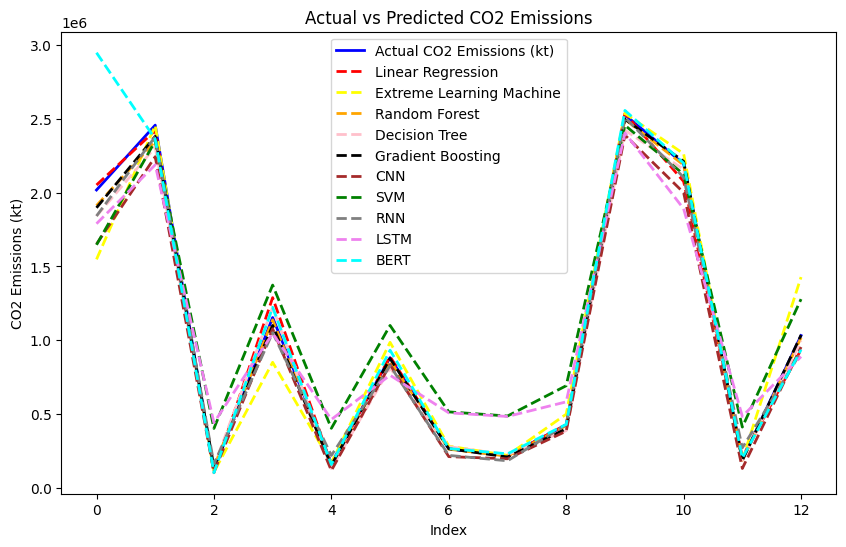

In [ ]:
# Plotting Graph

indices_test = np.arange(len(y_test))
indices_pred = np.arange(len(y_test) - len(y_pred), len(y_test))

plt.figure(figsize=(10, 6))
plt.plot(indices_test, plot_test, label='Actual CO2 Emissions (kt)', color='blue', linewidth=2)
plt.plot(indices_pred, plot_lr, label='Linear Regression', color='red', linewidth=2, linestyle='--')
plt.plot(indices_pred, plot_elm, label='Extreme Learning Machine', color='yellow', linewidth=2, linestyle='--')
plt.plot(indices_pred, plot_rf, label='Random Forest', color='orange', linewidth=2, linestyle='--')
plt.plot(indices_pred, plot_dt, label='Decision Tree', color='pink', linewidth=2, linestyle='--')
plt.plot(indices_pred, plot_gb, label='Gradient Boosting', color='black', linewidth=2, linestyle='--')
plt.plot(indices_pred, plot_cnn, label='CNN', color='brown', linewidth=2, linestyle='--')
plt.plot(indices_pred, plot_svm, label='SVM', color='green', linewidth=2, linestyle='--')
plt.plot(indices_pred, plot_rnn, label='RNN', color='grey', linewidth=2, linestyle='--')
plt.plot(indices_pred, plot_lstm, label='LSTM', color='violet', linewidth=2, linestyle='--')
plt.plot(indices_pred, plot_bert, label='BERT', color='cyan', linewidth=2, linestyle='--')
plt.title('Actual vs Predicted CO2 Emissions')
plt.xlabel('Index')
plt.ylabel('CO2 Emissions (kt)')
plt.legend()


<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb).

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Intro to RAPIDS cuDF to accelerate pandas](https://nvda.ws/rapids-cudf)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
